<a href="https://colab.research.google.com/github/gikirima/TugasML_Kmeans/blob/main/K_means_custom_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Euclidean Distance**

Load data

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/S2 Data Sains/Semester 2/Machine Learning/Pertemuan XII/heart_data.csv')

df.head()

,age,cholesterol,max_hr,st_depression
0,63,233,150,2.3
1,67,286,108,1.5
2,67,229,129,2.6
3,37,250,187,3.5
4,41,204,172,1.4


Exploratory Data Analysis

In [ ]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            30 non-null     int64  
 1   cholesterol    30 non-null     int64  
 2   max_hr         30 non-null     int64  
 3   st_depression  30 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.1 KB


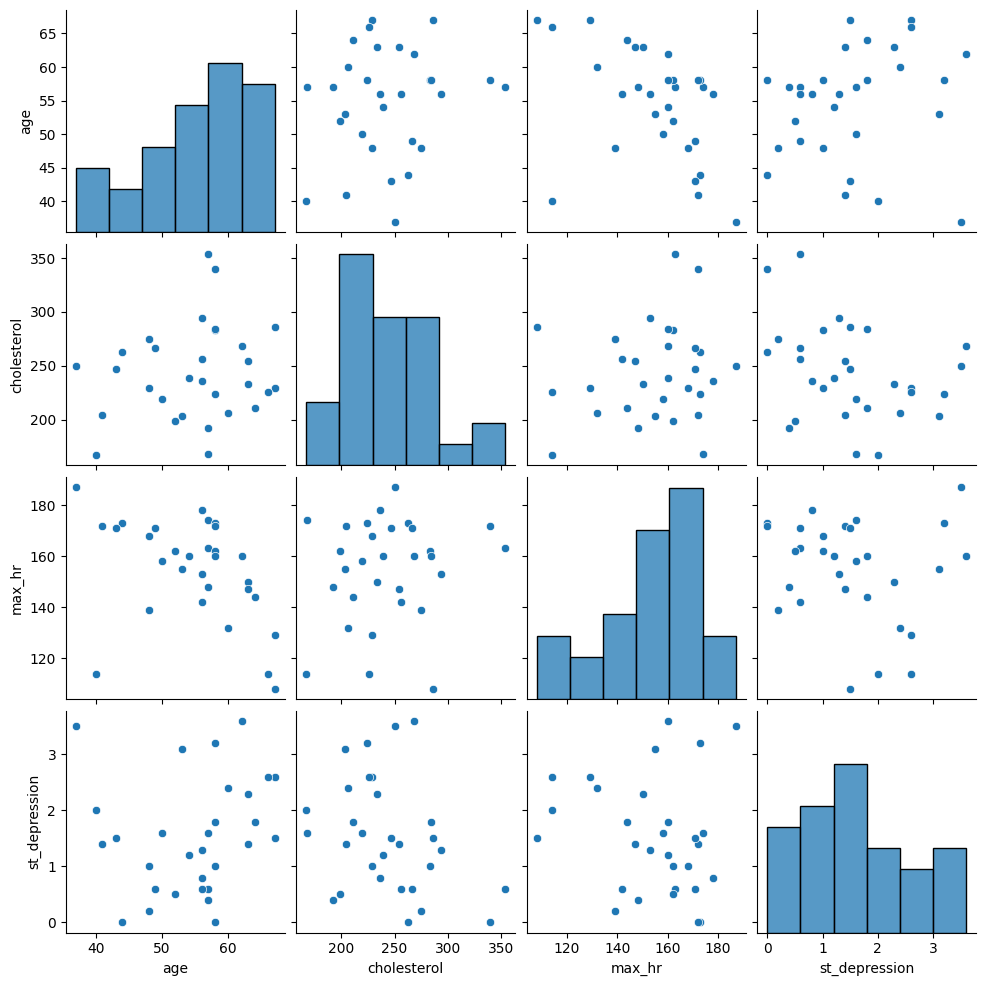

In [ ]:
# visualisasi distribusi masing masing kolom
import seaborn as sns

sns.pairplot(df)

<Axes: >

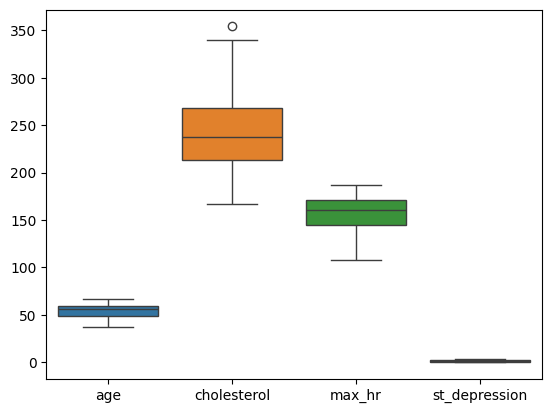

In [ ]:
# visualisasi boxplot dari masing masing kolom
sns.boxplot(data=df)

In [ ]:
# Hitung Q1, Q3, dan IQR
Q1 = df['cholesterol'].quantile(0.25)
Q3 = df['cholesterol'].quantile(0.75)
IQR = Q3 - Q1

# Identifikasi outlier
outliers = df[(df['cholesterol'] < (Q1 - 1.5 * IQR)) | (df['cholesterol'] > (Q3 + 1.5 * IQR))]

print("Data kolesterol yang keluar dari boxplot (outliers):")
outliers


Data kolesterol yang keluar dari boxplot (outliers):


,age,cholesterol,max_hr,st_depression
7,57,354,163,0.6


In [ ]:
# hapus data outlier
df = df[(df['cholesterol'] >= (Q1 - 1.5 * IQR)) & (df['cholesterol'] <= (Q3 + 1.5 * IQR))]
df

,age,cholesterol,max_hr,st_depression
0,63,233,150,2.3
1,67,286,108,1.5
2,67,229,129,2.6
3,37,250,187,3.5
4,41,204,172,1.4
5,56,236,178,0.8
6,62,268,160,3.6
8,63,254,147,1.4
9,53,203,155,3.1
10,57,192,148,0.4


In [ ]:
# cari duplikat
df.duplicated().sum()

np.int64(0)

Preprocessing

In [ ]:
# standarisasi data dengan standarscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 1.02595807, -0.17374726, -0.21861628,  0.72850083],
       [ 1.51773962,  1.20279675, -2.33190697, -0.06872649],
       [ 1.51773962, -0.27763737, -1.27526163,  1.02746108],
       [-2.17062203,  0.26778572,  1.64309219,  1.92434181],
       [-1.67884047, -0.92695059,  0.88834551, -0.16837991],
       [ 0.16534035, -0.09582967,  1.19024418, -0.7663004 ],
       [ 0.90301268,  0.73529124,  0.28454817,  2.02399523],
       [ 1.02595807,  0.37167584, -0.36956561, -0.16837991],
       [-0.20349582, -0.95292311,  0.03296595,  1.52572815],
       [ 0.28828574, -1.23862093, -0.31924917, -1.16491406],
       [ 0.16534035,  1.41057698, -0.06766694, -0.26803332],
       [ 0.16534035,  0.4236209 , -0.62114784, -0.96560723],
       [-1.31000431,  0.6054286 ,  0.93866196, -1.56352772],
       [-0.3264412 , -1.05681323,  0.38518106, -1.06526065],
       [ 0.28828574, -1.86196161,  0.9889784 ,  0.03092692],
       [-0.81822276, -0.27763737,  0.68707973, -0.56699357],
       [-0.08055043, -0.

Terapkan Algoritma K-means metric euclidean distance (cukup dengan library dari sklearn)

In [ ]:
# algoritma K-means, k=2
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit_predict(df_scaled)

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1], dtype=int32)

Visualisasi dengan PCA

In [ ]:
# reduksi dimensi dengan PCA terhadap dataset asli untuk visualisasi
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df_pca

array([[ -6.7950527 ,  -5.56385676],
       [ 42.32992102, -51.50460682],
       [-12.537228  , -26.53475775],
       [ 12.62877107,  34.8452419 ],
       [-34.36787809,  23.09011279],
       [ -1.50537721,  22.96578458],
       [ 28.90217121,   1.54937275],
       [ 13.84729664, -10.16160293],
       [-36.5269361 ,   3.95287052],
       [-47.96092056,  -2.84703758],
       [ 53.98719183,  -5.97606777],
       [ 15.17858833, -13.596575  ],
       [ 24.55738062,  18.6461605 ],
       [-39.89369046,  11.30916067],
       [-69.5302712 ,  24.32265067],
       [ -9.61966639,  15.6203965 ],
       [ -0.19731593,   5.6957875 ],
       [ 33.57814356, -16.23375361],
       [ 27.51535895,  15.33371257],
       [-29.19845404,  -9.84281296],
       [ 43.90799385,   3.19831813],
       [ 44.7184365 ,   1.17209714],
       [-13.85432935,  18.61413564],
       [-35.37982406, -20.19398153],
       [-20.41289827,   6.2617626 ],
       [101.55303876,   8.32773885],
       [-16.89914839, -40.63257507],
 

Text(0, 0.5, 'Explained Variance Ratio')

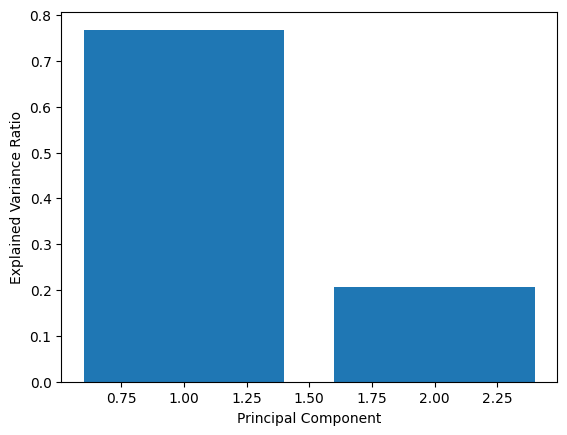

In [ ]:
# bar graph penjelasan varians data dengan PCA
import matplotlib.pyplot as plt

plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

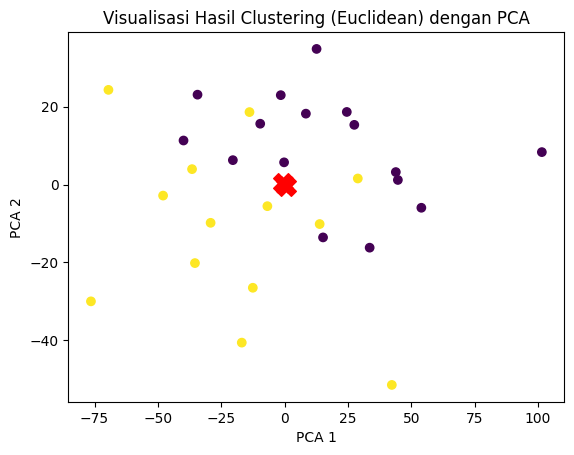

In [ ]:
# visualisasikan df_PCA dengan warna hasil clustering
import matplotlib.pyplot as plt

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (Euclidean) dengan PCA')
# tambahkan marker centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.show()

# **Metrik CityBlock (Manhattan Distance)**

In [ ]:
import numpy as np

# Fungsi Manhattan Distance
def manhattan_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sum(np.abs(a - b))

# fungsi kustom k-means dengan metric manhattan distance
def custom_kmeans_manhattan(X, n_clusters=2, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    # inisiasi centroid secara acak
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        # buat kluster berdasarkan manhattan distance
        labels = np.array([
            np.argmin([manhattan_distance(x, c) for c in centroids])
            for x in X
        ])

        # mengubah titik centroid dengan mean
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # break jika centroid tidak berubah
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# run algoritma klustering
labels, centroids = custom_kmeans_manhattan(df_scaled, n_clusters=2)


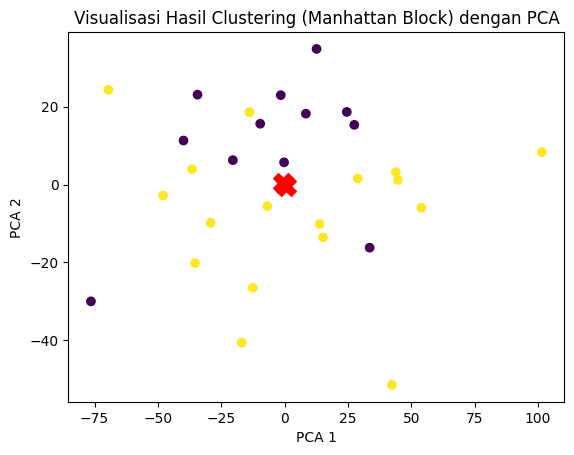

In [ ]:
# visualisasikan df_PCA dengan warna hasil clustering
import matplotlib.pyplot as plt

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (Manhattan Block) dengan PCA')
# tambahkan marker centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.show()